# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
city_list = []
cloud = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []
index_counter = 0
set_counter = 1

In [21]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={weather_api_key}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        time.sleep(1)
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 : mangaratiba
Processing Record 2 of Set 1 : severo-kurilsk
Processing Record 3 of Set 1 : provideniya
Processing Record 4 of Set 1 : new norfolk
Processing Record 5 of Set 1 : christchurch
Processing Record 6 of Set 1 : barrow
Processing Record 7 of Set 1 : ponta do sol
Processing Record 8 of Set 1 : altay
Processing Record 9 of Set 1 : la ronge
City not found. Skipping...
Processing Record 10 of Set 1 : lodwar
City not found. Skipping...
Processing Record 11 of Set 1 : yellowknife
Processing Record 12 of Set 1 : seoul
Processing Record 13 of Set 1 : bengkulu
Processing Record 14 of Set 1 : geraldton
Processing Record 15 of Set 1 : vao
Processing Record 16 of Set 1 : salvador
Processing Record 17 of Set 1 : tornio
Processing Record 18 of Set 1 : yakeshi
Processing Record 19 of Set 1 : kahului
Processing Record 20 of Set 1 : bluff
Processing Record 21 of Set 1 : mataura
Pr

Processing Record 34 of Set 4 : show low
Processing Record 35 of Set 4 : gamba
Processing Record 36 of Set 4 : fos-sur-mer
Processing Record 37 of Set 4 : oudtshoorn
Processing Record 38 of Set 4 : kaitangata
Processing Record 39 of Set 4 : podgornoye
City not found. Skipping...
Processing Record 40 of Set 4 : tiznit
Processing Record 41 of Set 4 : north bend
Processing Record 42 of Set 4 : egvekinot
Processing Record 43 of Set 4 : kitimat
Processing Record 44 of Set 4 : nyandoma
Processing Record 45 of Set 4 : san andres
Processing Record 46 of Set 4 : port lincoln
Processing Record 47 of Set 4 : ancud
Processing Record 48 of Set 4 : alofi
Processing Record 49 of Set 4 : lagoa
City not found. Skipping...
Processing Record 50 of Set 4 : nizhnyaya tura
Processing Record 0 of Set 5 : yumen
Processing Record 1 of Set 5 : dwarka
Processing Record 2 of Set 5 : comodoro rivadavia
Processing Record 3 of Set 5 : kiyasovo
Processing Record 4 of Set 5 : port-gentil
Processing Record 5 of Set 5 :

Processing Record 16 of Set 8 : teluk nibung
Processing Record 17 of Set 8 : winton
Processing Record 18 of Set 8 : gobabis
Processing Record 19 of Set 8 : faya
Processing Record 20 of Set 8 : narsaq
City not found. Skipping...
Processing Record 21 of Set 8 : san juan nepomuceno
Processing Record 22 of Set 8 : tilichiki
Processing Record 23 of Set 8 : ilo
Processing Record 24 of Set 8 : natal
Processing Record 25 of Set 8 : lucapa
Processing Record 26 of Set 8 : sosnovka
Processing Record 27 of Set 8 : nizhniy tsasuchey
Processing Record 28 of Set 8 : najran
Processing Record 29 of Set 8 : pompeu
Processing Record 30 of Set 8 : nuuk
Processing Record 31 of Set 8 : nantucket
Processing Record 32 of Set 8 : port-cartier
Processing Record 33 of Set 8 : onega
Processing Record 34 of Set 8 : rakiv lis
Processing Record 35 of Set 8 : bougouni
Processing Record 36 of Set 8 : jumla
Processing Record 37 of Set 8 : vila velha
Processing Record 38 of Set 8 : pangody
Processing Record 39 of Set 8 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weatherdf = pd.DataFrame({
    "City": city_list,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
    })
weatherdf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mangaratiba,-22.9597,-44.0406,294.28,89,100,0.78,BR,1635228123
1,Severo-Kuril'sk,50.6789,156.1250,280.76,86,25,6.72,RU,1635228125
2,Provideniya,64.3833,-173.3000,266.21,58,75,4.00,RU,1635228126
3,New Norfolk,-42.7826,147.0587,290.31,50,2,0.45,AU,1635228128
4,Christchurch,-43.5333,172.6333,288.68,85,90,0.45,NZ,1635228002


In [26]:
weatherdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        536 non-null    object 
 1   Lat         536 non-null    float64
 2   Lng         536 non-null    float64
 3   Max Temp    536 non-null    float64
 4   Humidity    536 non-null    int64  
 5   Cloudiness  536 non-null    int64  
 6   Wind Speed  536 non-null    float64
 7   Country     536 non-null    object 
 8   Date        536 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 37.8+ KB


In [28]:
weatherdf.to_csv("cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
#humidity_df = (weatherdf["Humidity"] >= 100) == True
#humidity_df

over_hundred = weatherdf.loc[weatherdf["Humidity"] > 100]
len(over_hundred)

0

In [41]:
#  Get the indices of cities that have humidity over 100%.
print("There are no cities with humidity over 100%")

There are no cities with humidity over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

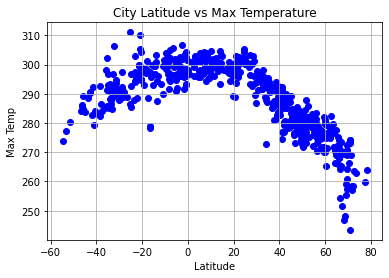

In [47]:
plt.scatter(weatherdf["Lat"], weatherdf["Max Temp"], color = "blue")
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

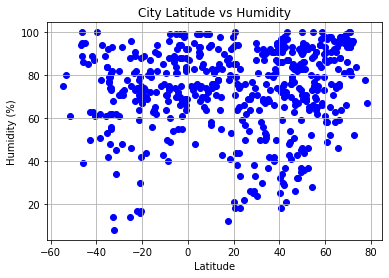

In [48]:
plt.scatter(weatherdf["Lat"], weatherdf["Humidity"], color = "blue")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

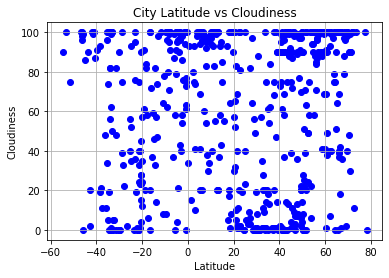

In [50]:
plt.scatter(weatherdf["Lat"], weatherdf["Cloudiness"], color = "blue")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

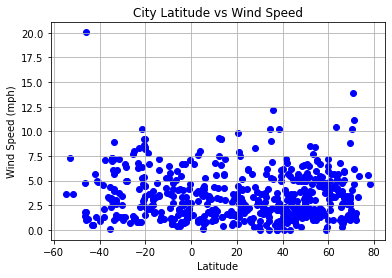

In [51]:
plt.scatter(weatherdf["Lat"], weatherdf["Wind Speed"], color = "blue")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [56]:
northern = weatherdf.loc[weatherdf["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weatherdf.loc[weatherdf["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [57]:
northern.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,Severo-Kuril'sk,50.6789,156.1250,280.76,86,25,6.72,RU,1635228125
1,2,Provideniya,64.3833,-173.3000,266.21,58,75,4.00,RU,1635228126
2,5,Barrow,71.2906,-156.7887,269.16,80,90,4.63,US,1635228130
3,6,Ponta do Sol,32.6667,-17.1000,294.10,69,11,3.30,PT,1635228132
4,7,Altay,47.8667,88.1167,284.11,43,7,0.30,CN,1635228133


In [58]:
southern.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Mangaratiba,-22.9597,-44.0406,294.28,89,100,0.78,BR,1635228123
1,3,New Norfolk,-42.7826,147.0587,290.31,50,2,0.45,AU,1635228128
2,4,Christchurch,-43.5333,172.6333,288.68,85,90,0.45,NZ,1635228002
3,12,Bengkulu,-3.8004,102.2655,301.67,70,100,3.30,ID,1635228141
4,13,Geraldton,-28.7667,114.6000,292.38,48,75,6.69,AU,1635227882


In [59]:
# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
northlat = northern["Lat"]
northtemp = northern["Max Temp"]
northhum = northern["Humidity"]
northcloud = northern["Cloudiness"]
northwind = northern["Wind Speed"]

southlat = southern["Lat"]
southtemp = southern["Max Temp"]
southhum = southern["Humidity"]
southcloud = southern["Cloudiness"]
southwind = southern["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.9026407665966614


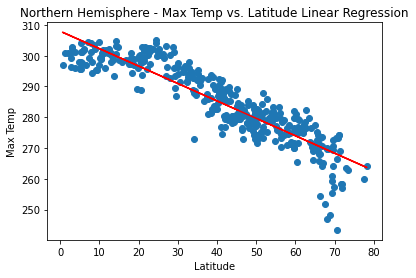

In [64]:
plt.scatter(northlat, northtemp)

slope, intercept, r, p, std_err = linregress(northlat, northtemp)
fit = slope * northlat + intercept
plt.plot(northlat,fit,color="red")
print(f"The r-value is {r}")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("Images/Northern Max Temp vs Lat Linear Regression.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6521232117594247


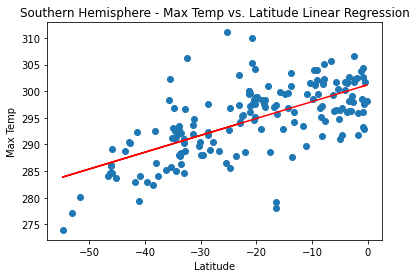

In [65]:
plt.scatter(southlat, southtemp)

slope, intercept, r, p, std_err = linregress(southlat, southtemp)
fit = slope * southlat + intercept
plt.plot(southlat,fit,color="red")
print(f"The r-value is {r}")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("Images/Southern Max Temp vs Lat Linear Regression.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.1462811355789922


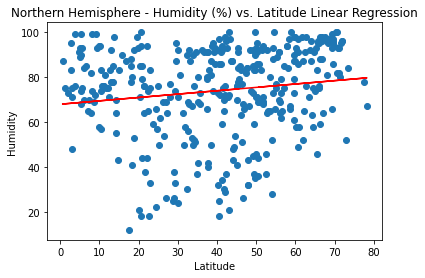

In [66]:
plt.scatter(northlat, northhum)

slope, intercept, r, p, std_err = linregress(northlat, northhum)
fit = slope * northlat + intercept
plt.plot(northlat,fit,color="red")
print(f"The r-value is {r}")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("Images/Northern Humidity vs Lat Linear Regression.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.10405098738487802


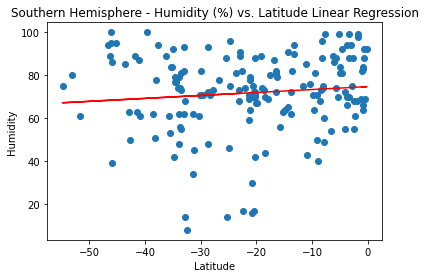

In [67]:
plt.scatter(southlat, southhum)

slope, intercept, r, p, std_err = linregress(southlat, southhum)
fit = slope * southlat + intercept
plt.plot(southlat,fit,color="red")
print(f"The r-value is {r}")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("Images/Southern Humidity vs Lat Linear Regression.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.11675982640867284


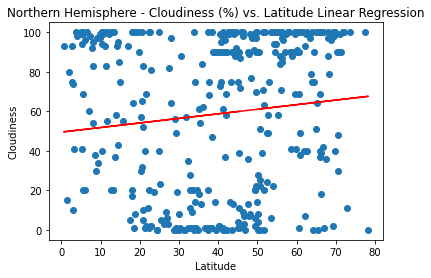

In [69]:
plt.scatter(northlat, northcloud)

slope, intercept, r, p, std_err = linregress(northlat, northcloud)
fit = slope * northlat + intercept
plt.plot(northlat,fit,color="red")
print(f"The r-value is {r}")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("Images/Northern Cloudiness vs Lat Linear Regression.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.13161606193459832


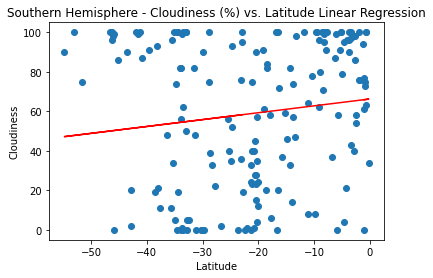

In [70]:
plt.scatter(southlat, southcloud)

slope, intercept, r, p, std_err = linregress(southlat, southcloud)
fit = slope * southlat + intercept
plt.plot(southlat,fit,color="red")
print(f"The r-value is {r}")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("Images/Southern Cloudiness vs Lat Linear Regression.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0986740185736454


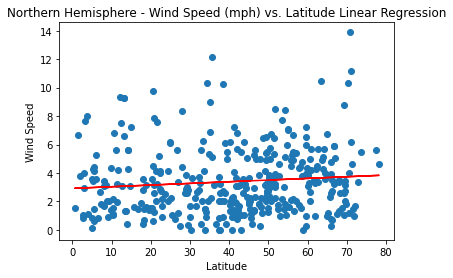

In [71]:
plt.scatter(northlat, northwind)

slope, intercept, r, p, std_err = linregress(northlat, northwind)
fit = slope * northlat + intercept
plt.plot(northlat,fit,color="red")
print(f"The r-value is {r}")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("Images/Northern Wind vs Lat Linear Regression.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.14845911900413888


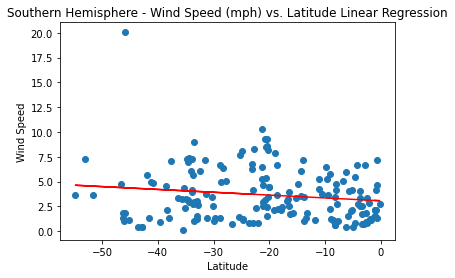

In [72]:
plt.scatter(southlat, southwind)

slope, intercept, r, p, std_err = linregress(southlat, southwind)
fit = slope * southlat + intercept
plt.plot(southlat,fit,color="red")
print(f"The r-value is {r}")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("Images/Southern Wind vs Lat Linear Regression.png")

plt.show()

TRENDS: 

1) Temperature is highest near the equator, and gets cooler the further distance away from the equator.
2) Latitude does not seem to have a signifcant effect on both cloudiness and wind speed, data is skewed with no significant trends that show any relationship or correlation between those variables.
3) The further south of the equator, the less cloudy it becomes, while the further north of the equator, the cloudiness tends to rise. 